In [44]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [45]:
data = LoadMLData(os.path.join(DATAPATH, "autosomal_estimates/perlocus", "autosomal_estimates_ml_filtered.bed.gz"))
features = pd.read_csv(os.path.join(DATAPATH, "constraint", "lobSTR_ref_GRCh37_properties_filtered.tab.gz"), sep="\t").drop_duplicates()
features["period"] = features["motif"].apply(len)
data = pd.merge(data, features, on=["chrom","start","end"])

In [46]:
data = data[(data["stderr_ml"]>=0)]

In [47]:
data.columns

Index([u'chrom', u'start', u'end', u'est_logmu_ml', u'est_beta_eff_ml',
       u'est_beta_ml', u'est_pgeom_ml', u'stderr_ml', u'numsamples_ml',
       u'motif', u'length', u'uninterrupted_length', u'reptiming', u'score',
       u'GC', u'entropy', u'filter', u'period'],
      dtype='object')

In [48]:
# Get mu by features
PERIODS = range(1, 7)
byperiod = {}
for period in range(1, 7):
    byperiod[period] = {"mu": np.mean(data[data["period"]==period]["est_logmu_ml"]),
                        "beta": np.mean(data[data["period"]==period]["est_logmu_ml"]),
                        "pgeom": np.mean(data[data["period"]==period]["est_pgeom_ml"])}

fdata = {}

# Length
lendata = []
lbins = ["0.20","21.30","31.40","41.50","51.60","61.70"]
fname = "uninterrupted_length"
for l in lbins:
    ldict = {}
    lb, ub = map(float, l.split("."))
    for p in PERIODS:
        ldict[p] = {"mu": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
                    "muerr": np.var(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
                   "beta": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_beta_ml"]),
                   "pgeom": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_pgeom_ml"])}
    lendata.append((l, ldict))
fdata[fname] = lendata

# Recomb
#rcdata = []
#rbins = ["0.1", "1.2", "2.10", "10.20"]
#fname = "recomb"
#for r in rbins:
#    rdict = {}
#    lb, ub = map(float, r.split("."))
#    for p in PERIODS:
#        rdict[p] = {"mu": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
#                    "muerr": np.var(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
#                   "beta": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_beta_ml"]),
#                   "pgeom": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_pgeom_ml"])}

#    rcdata.append((r, rdict))
#fdata[fname] = rcdata

# ToR
mdata = []
mbins = ["-2.-1", "-1.0", "0.1", "1.2"]
fname = "reptiming"
for m in mbins:
    mdict = {}
    lb, ub = map(float, m.split("."))
    for p in PERIODS:
        mdict[p] = {"mu": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
                    "muerr": np.var(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
                   "beta": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_beta_ml"]),
                   "pgeom": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_pgeom_ml"])}

    mdata.append((m, mdict))
fdata["reptiming"] = mdata

# GC
gcdata = []
gbins = ["20.40", "40.60", "60.80"]
fname = "GC"
for g in gbins:
    gdict = {}
    lb, ub = map(lambda x: float(x)/100, g.split("."))
    for p in PERIODS:
        gdict[p] = {"mu": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
                    "muerr": np.var(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
                   "beta": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_beta_ml"]),
                   "pgeom": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_pgeom_ml"])}

    gcdata.append((g, gdict))
fdata[fname] = gcdata

# entropy
edata = []
ebins = ["0.20", "20.30", "30.40"]
fname = "entropy"
for e in ebins:
    edict = {}
    lb, ub = map(lambda x: float(x)/20, e.split("."))
    for p in PERIODS:
        edict[p] = {"mu": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
                    "muerr": np.var(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_logmu_ml"]),
                   "beta": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_beta_ml"]),
                   "pgeom": np.mean(data[(data["period"]==p) & (data[fname]>lb) & (data[fname]<=ub)]["est_pgeom_ml"])}

    edata.append((e, edict))
fdata["entropy"] = edata

# Motif
motifdata = []
motifs = ["A/AT/AAT/AAAT/AAAAT/AAAAAT",
         "A/AC/AAC/AAAC/AAAAC/AAAAAC",
         "A/AG/AAG/AAAG/AAAAG/AAAAAG",
         "C/CG/CCG/CCCG/CCCCG/CCCCCG"]
fname = "motif"
for m in motifs:
    mdict = {}
    for p in PERIODS:
        motif = m.split("/")[p-1]
        mdict[p] = {"mu": np.mean(data[(data["period"]==p) & (data[fname]==motif)]["est_logmu_ml"]),
                    "muerr": np.var(data[(data["period"]==p) & (data[fname]==motif)]["est_logmu_ml"]),
                   "beta": np.mean(data[(data["period"]==p) & (data[fname]==motif)]["est_beta_ml"]),
                   "pgeom": np.mean(data[(data["period"]==p) & (data[fname]==motif)]["est_pgeom_ml"])
        }
    motifdata.append((m, mdict))
fdata["motif"] = motifdata

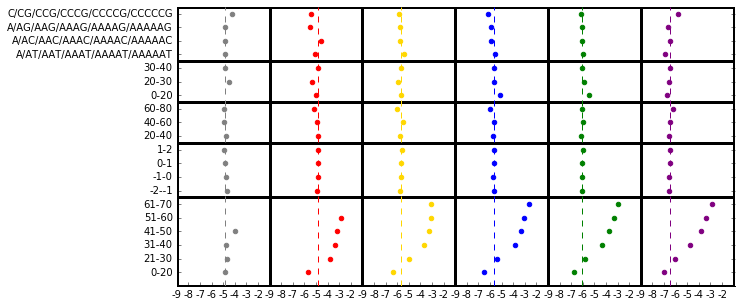

In [49]:
MINLOGMU = -9
MAXLOGMU = -1
MINBETA = 0
MAXBETA = 1
FEATURES = ["uninterrupted_length","reptiming","GC","entropy","motif"]
colordict = {
    1: "gray",
    2: "red",
    3: "gold",
    4: "blue",
    5: "green",
    6: "purple",
}

fig = plt.figure()
fig.set_size_inches((10, 5))
ax = fig.add_subplot(111)

yticklabels = []
yticks = []

xticks = []
xticklabels = []
for period in PERIODS:
    xticks.extend(map(lambda x: x+(MAXLOGMU-MINLOGMU)*(period-1), range(MINLOGMU, MAXLOGMU)))
    xticklabels.extend(range(MINLOGMU, MAXLOGMU))
    
# Separate periods
ax.axvline(x=MINLOGMU, color="black", lw=3)
ax.axvline(x=MAXLOGMU, color="black", lw=3)
for period in PERIODS:
    ax.axvline(x=MAXLOGMU+(period-1)*(MAXLOGMU-MINLOGMU), color="black", lw=3)
    
ybase = 0
ax.axhline(ybase, color="black", lw=3) 
for fnum in range(len(FEATURES)):
    ff = fdata[FEATURES[fnum]]
    bins = map(lambda x: x[0], ff)
    yticklabels.extend(bins)
    yticks.extend([ybase+1+i for i in range(len(bins))])
    for period in PERIODS:
        for binnum in range(len(ff)):
            m = ff[binnum][1][period]["mu"]
            if m is not None and not np.isnan(m):
                xval = m + (period-1)*(MAXLOGMU-MINLOGMU)
                yval = ybase + binnum + 1
                ax.scatter([xval], [yval], color=colordict[period])
    ax.axhline(ybase+len(bins)+0.5, color="black", lw=3) 
    ybase = ybase + len(bins)
    
# period aggregates
for period in PERIODS:
    ax.axvline(x=(byperiod[period]["mu"])+(MAXLOGMU-MINLOGMU)*(period-1), color=colordict[period], linestyle="dashed")

ax.set_xlim(left=MINLOGMU, right=MAXLOGMU+(MAXLOGMU-MINLOGMU)*(len(PERIODS)-1)+0.1);
ax.set_yticks(yticks)
ax.set_yticklabels(map(lambda x: x.replace(".","-"),yticklabels));
ax.set_ylim(bottom=0, top=ybase+0.5);
ax.set_xticks(xticks);
ax.set_xticklabels(xticklabels);
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom()
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure12_seqfeatures.pdf"))

In [50]:
# Get r for each feature
for f in FEATURES+["length","period",'score']:
    if f == "motif": continue
    print f, scipy.stats.pearsonr(data["est_logmu_ml"], data[f])

uninterrupted_length (0.31793072021658075, 0.0)
reptiming (-0.038918718016026109, 2.5908244614215965e-286)
GC (-0.057892318514101593, 0.0)
entropy (0.0070194186779475891, 7.0559343071809425e-11)
length (0.097829404541001377, 0.0)
period (-0.28512451647866455, 0.0)
score (0.225268603239727, 0.0)
